# 1. Load Important Libraries and Data Set

In [1]:
import numpy as np
import pandas as pd
import sklearn
import time
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [2]:
heart = pd.read_csv("/Users/selamawit/Desktop/STA160/Midterm/heart.csv")

# 2. Data Descriptions

|No| Variable Code | Name | Description |
|---| --- | --- | --- |
|1 | HeartDiseaseorAttack | Heart Disease or Heart Attack | Respondents who reported having heart disease or heart attack |
|2 | HighBP | High Blood Pressure | Patients with high blood pressure |
|3 | HighChol | High Cholestrol | Patients with high cholestrol |
|4 | CholCheck | Cholestrol Check | Patients who have cholestrol within past five years |
|5 | BMI | Body Mass Index | Patients record of Body Mass Index |
|6 | Smoker | Smoking | Patients who smoked at least 100 cigarettes in their entire life |
|7 | Stroke | Stroke | Patients who had stroke |
|8 | Diabetes | Diabetes | Patients who had diabetes |
|9 | PhysActivity | Physical Activity | Patients who exercised the past thirty days other than regular job |
|10 | DiffWalk | Difficulty Walking | Patients who experience serious difficulty walking or climbing stairs |
|11 | Age | Age | fourteen level of age category |

In [3]:
heart.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
heart.shape

(253680, 22)

# 3. Data Preprocessing

In [5]:
print('DataFrame after dropping the rows having missing values:', heart.drop_duplicates(inplace=True))
print('Original dataframe dimension:', heart.shape)

DataFrame after dropping the rows having missing values: None
Original dataframe dimension: (229781, 22)


In [6]:
for col in heart.columns:
    print("{}: {}".format(col, heart[col].isnull().sum()))

HeartDiseaseorAttack: 0
HighBP: 0
HighChol: 0
CholCheck: 0
BMI: 0
Smoker: 0
Stroke: 0
Diabetes: 0
PhysActivity: 0
Fruits: 0
Veggies: 0
HvyAlcoholConsump: 0
AnyHealthcare: 0
NoDocbcCost: 0
GenHlth: 0
MentHlth: 0
PhysHlth: 0
DiffWalk: 0
Sex: 0
Age: 0
Education: 0
Income: 0


In [7]:
#significant variables
data = heart[["HeartDiseaseorAttack", "HighBP", "HighChol", "Smoker", "Stroke","Diabetes", "PhysActivity", "DiffWalk", "Age"]]
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,Smoker,Stroke,Diabetes,PhysActivity,DiffWalk,Age
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.103216,0.454441,0.441760,0.465661,0.044756,0.325627,0.733355,0.185507,8.086582
std,0.304241,0.497921,0.496598,0.498821,0.206767,0.724623,0.442206,0.388709,3.093809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,10.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,13.000000


In [8]:
print("Information about the dataset:")
print(data.info())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   Smoker                229781 non-null  float64
 4   Stroke                229781 non-null  float64
 5   Diabetes              229781 non-null  float64
 6   PhysActivity          229781 non-null  float64
 7   DiffWalk              229781 non-null  float64
 8   Age                   229781 non-null  float64
dtypes: float64(9)
memory usage: 17.5 MB
None


In [9]:
data.Age.unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

# 4. Visualizations

# 4.1. Correlation Heat Map

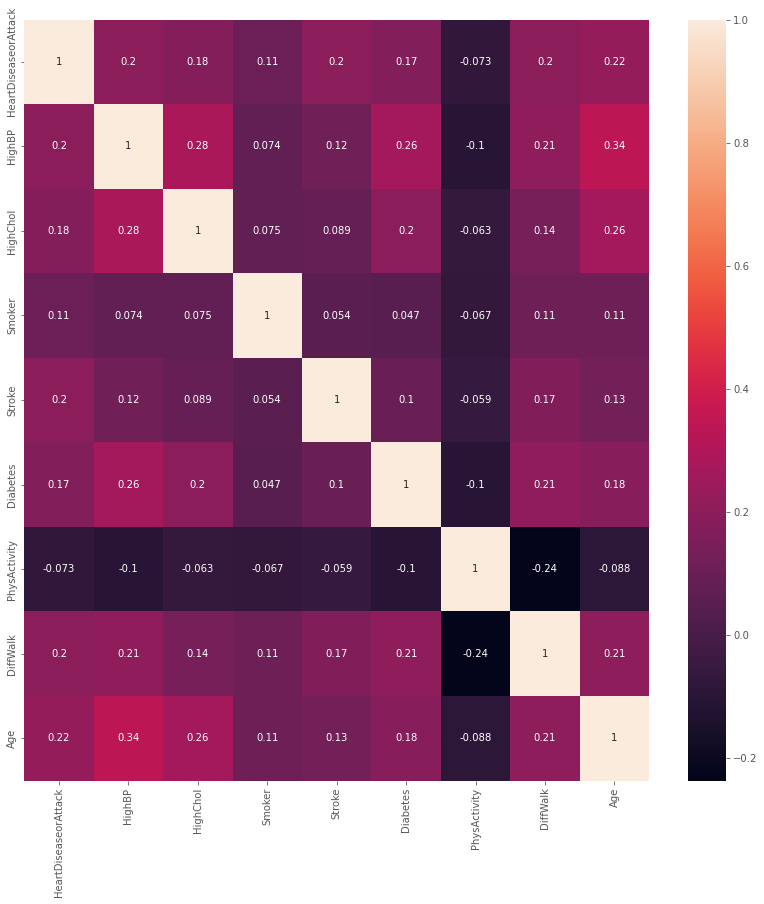

In [10]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot = True)
plt.show()

# 4.2. Bar Plots of Variable Counts

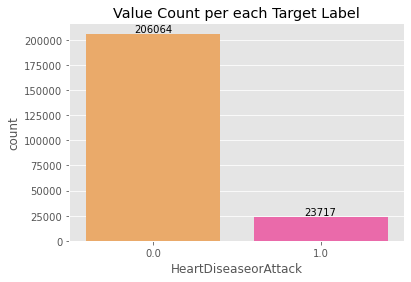

In [11]:
ax = sns.countplot(x = data["HeartDiseaseorAttack"], order = data["HeartDiseaseorAttack"].value_counts().index, palette="spring_r")
abs_values = data["HeartDiseaseorAttack"].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value Count per each Target Label")
plt.show()

/var/folders/7n/5jr07rw942zbkmbf9mqq6pxw0000gn/T/ipykernel_6091/2909235989.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features = data.drop('HeartDiseaseorAttack',1)


None


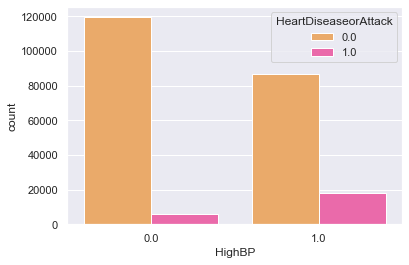

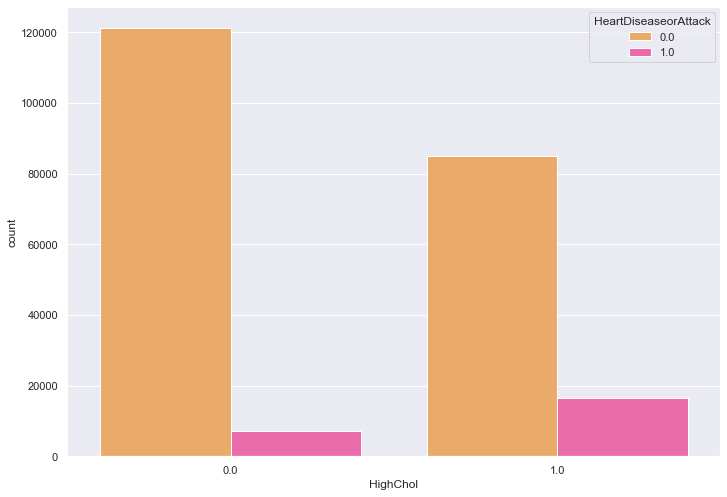

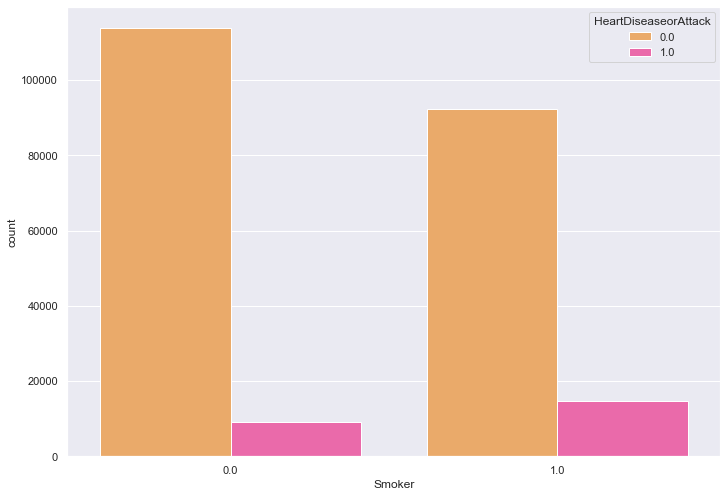

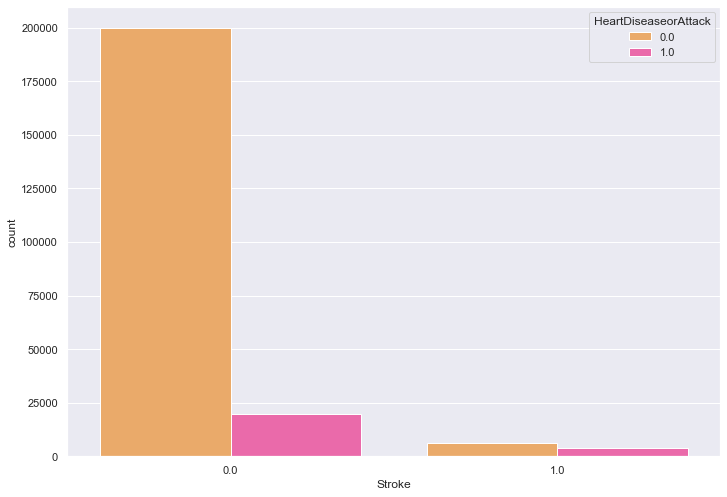

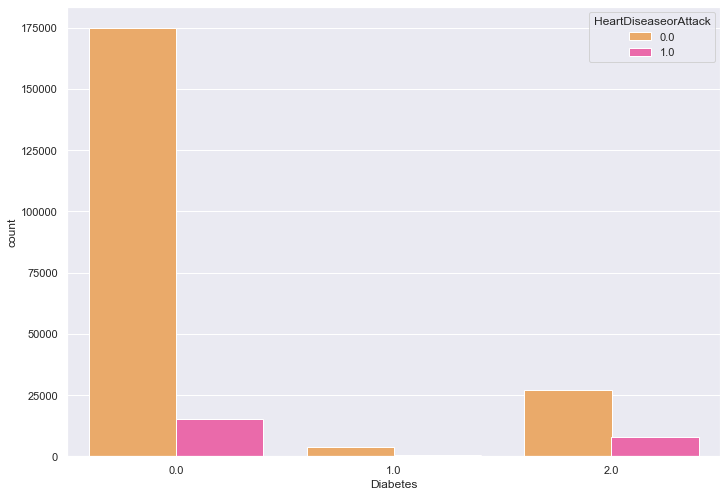

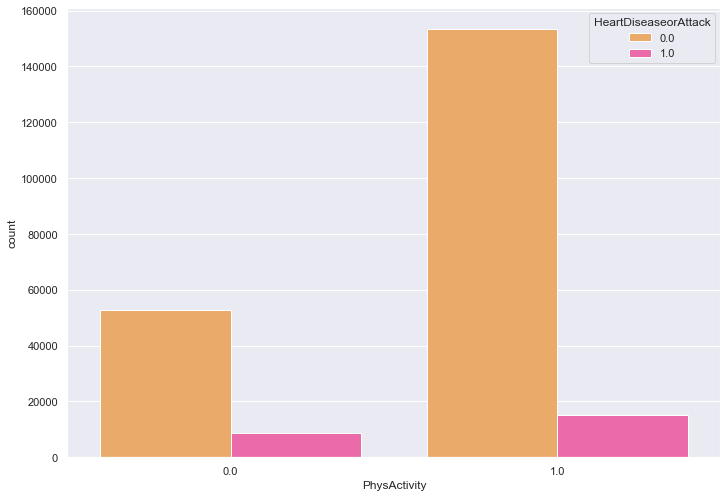

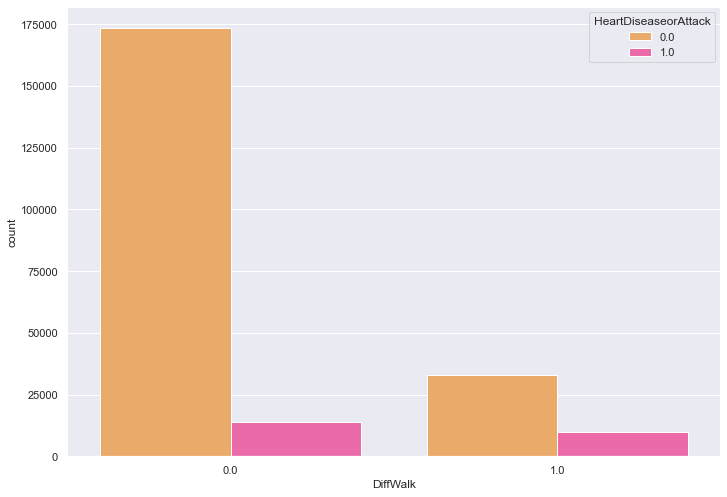

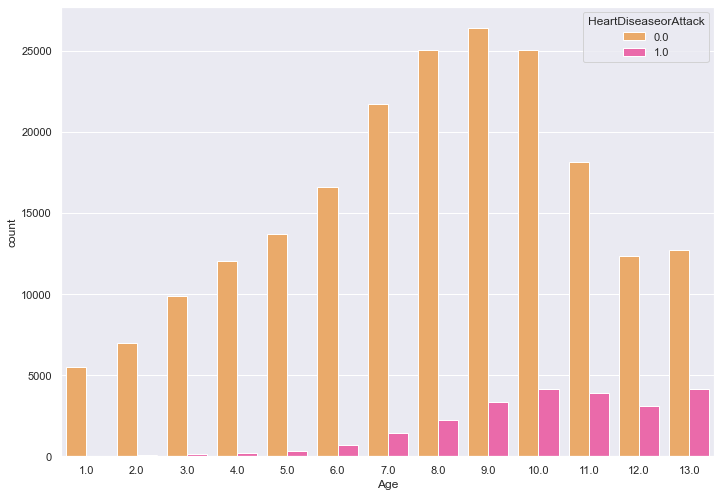

In [12]:
def plot_data(hue,data):
    for i,col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7, 8.27)})
        ax = sns.countplot(x=data[col], hue=hue, data=data, palette="spring_r")
        
hue = data["HeartDiseaseorAttack"]
features = data.drop('HeartDiseaseorAttack',1)
print(plot_data(hue, features))

In [14]:
features = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'DiffWalk', 'Age']
X = data.loc[:, features].values
Y = data.loc[:, ['HeartDiseaseorAttack']].values

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Standardize features:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 5. Principal Component Algorithm

In [15]:
# Perform PCA
pca = PCA()
pc = pca.fit_transform(X_train_s) 
pca_df = pd.DataFrame(data=pc, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7', 'PC8'])
# df = pd.concat([pca_df, data[['HeartDiseaseorAttack']]], axis = 1)
df = pca_df.join(data[['HeartDiseaseorAttack']]).dropna()
print(df)

             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0       1.046097 -0.989409 -0.460602 -0.525485  2.482191  1.207763  0.343053   
1      -1.640348 -0.173845  0.565207  0.321837 -0.024189 -0.411091 -0.069771   
2       0.202600 -0.463513 -1.332232 -0.021981 -0.313653 -1.304131  0.918384   
3       0.760694 -1.879975  0.289315 -0.120773 -1.240963 -0.140144 -0.010614   
4      -1.343729  0.088485 -1.134973 -0.050255  0.862434  1.935098 -1.020243   
...          ...       ...       ...       ...       ...       ...       ...   
183816 -0.357970 -0.154047 -1.158409  0.007699  0.205657 -0.745919  0.722414   
183817 -0.297304 -0.954760  0.524182  0.148059 -0.636396 -1.267243  0.708655   
183820  0.200123 -1.570509  0.463138 -0.091093 -0.721653  0.418068 -0.206583   
183821  0.464432 -1.396038  1.045737 -0.248446  1.603207  0.844826 -0.204171   
183823 -2.200918  0.135621  0.739029  0.351517  0.495120  0.147122 -0.265741   

             PC8  HeartDiseaseorAttack 

### Scree Plot for Principal Component Analysis

Percent of Variance for each Principal Component:
[26.4 13.3 12.1 11.8 10.2  9.4  8.8  8. ]


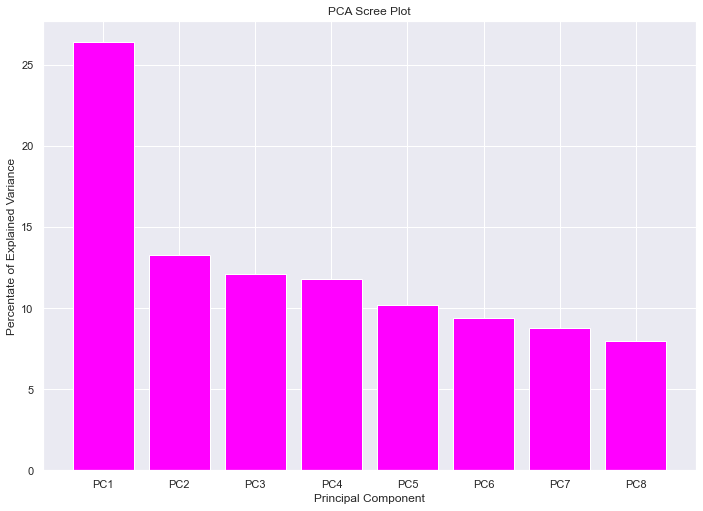

In [16]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
print("Percent of Variance for each Principal Component:")
print(per_var)

labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x = range(1,len(per_var)+1), height=per_var, tick_label=labels, color='magenta')
plt.ylabel('Percentate of Explained Variance')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

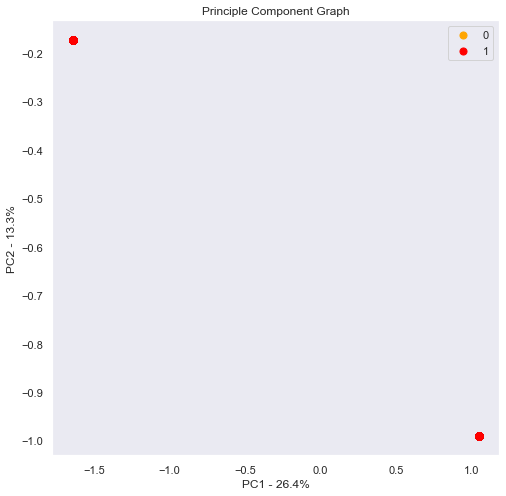

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_title('Principle Component Graph')
ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))


targets = [0, 1]
colors = ['orange', 'red']

for target, color in zip(targets,colors):
    ax.scatter(df.loc[df['HeartDiseaseorAttack'], 'PC1'],
              df.loc[df['HeartDiseaseorAttack'], 'PC2'],
              c = color, s = 50)
ax.legend(targets)
ax.grid()

In [18]:
pca.explained_variance_ratio_

array([0.2637879 , 0.13335902, 0.12075393, 0.11750832, 0.10206272,
       0.094437  , 0.08769511, 0.08039601])

The two components contain 39.7% of the information that is weak .  

PCA is not valid for non-continuous data in the first place.

# 6. Cross validation 

In [25]:
data1 = data.copy()
X = data1.iloc[:,2:]
Y = data1["HeartDiseaseorAttack"]

# Split data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Compute running time:
start = time.time()

# Scaling for training dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model based on Classification Algorithms
model = []
model.append(('LDA', LinearDiscriminantAnalysis()))
model.append(('LogsR', LogisticRegression()))
model.append(('KNN', KNeighborsClassifier()))
model.append(('SVM', SVC()))
model.append(('NB', GaussianNB()))

# Model Evaluation
results = []
names = []

for n, m in model:
    kfold = KFold(n_splits=10, random_state=None)
    cross_val = cross_val_score(m, X_train, Y_train, cv = kfold, scoring = "accuracy")
    results.append(cross_val)
    names.append(n)
    print(n, ":", round(cross_val.mean()*100), "%.")
             
end = time.time()
print("Computation running time: ", round((end - start)/60,2), "secs.")

LDA : 89 %.
LogsR : 90 %.
KNN : 88 %.
SVM : 90 %.
NB : 86 %.
Computation running time:  112.34 secs.


# 7. Fit the Classification Models

In [19]:
data2 = data.copy()
X = data2.iloc[:,2:]
Y = data2["HeartDiseaseorAttack"]

# Split Data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Scaling for training dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 7.1. Linear Discriminant Analysis

LDA model correctly predicts whether a patient has heart disease attack or not about 89.21 % of the time.
Accuracy for training set for LDA = 89.20597963269215
[[161166   3724]
 [ 16118   2816]]
Accuracy for test set for LDA = 89.30957199120917
[[40283   891]
 [ 4022   761]]
                    precision    recall  f1-score   support

 No Disease/Attack       0.91      0.98      0.94     41174
Yes Disease/Attack       0.46      0.16      0.24      4783

          accuracy                           0.89     45957
         macro avg       0.68      0.57      0.59     45957
      weighted avg       0.86      0.89      0.87     45957

Computation running time in Linear Discriminant Classifier:  0.02 secs.


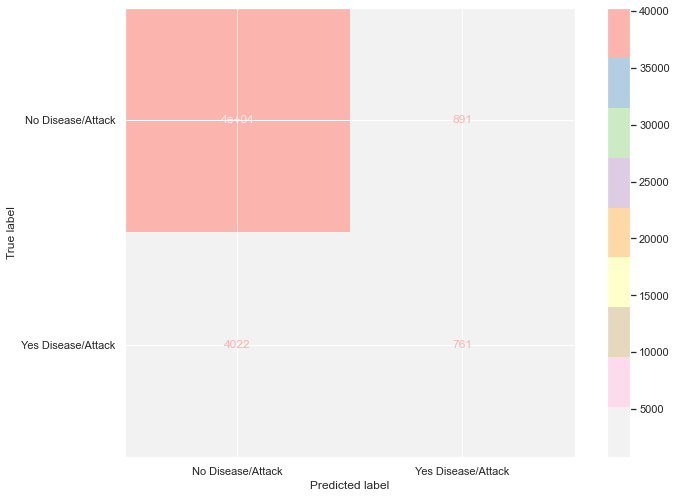

In [20]:
start = time.time()

### Build Model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train).transform(X_train)
print("LDA model correctly predicts whether a patient has heart disease attack or not about",round(lda.score(X_train, Y_train)*100, 2), "% of the time.")

### Check performance of our classifier
print('Accuracy for training set for LDA = {}'.format((round(confusion_matrix(Y_train, lda.predict(X_train))[0][0] + confusion_matrix(Y_train, lda.predict(X_train))[1][1])/len(Y_train))*100,2))
print(confusion_matrix(Y_train, lda.predict(X_train)))
Yhat1 = lda.predict(X_test)
print('Accuracy for test set for LDA = {}'.format((round(confusion_matrix(Y_test, Yhat1)[0][0] + confusion_matrix(Y_test, Yhat1)[1][1])/len(Y_test))*100,2))
print(confusion_matrix(Y_test, Yhat1))


### Plot confusion
plot_confusion_matrix(estimator=lda,
                      X = X_test,
                      y_true = Y_test,
                      display_labels=["No Disease/Attack", "Yes Disease/Attack"], cmap = "Pastel1_r")

### Classification report
print(classification_report(y_true = Y_test,y_pred = lda.predict(X_test),
                            target_names=["No Disease/Attack", "Yes Disease/Attack"]))

### Computation time
end = time.time()
print("Computation running time in Linear Discriminant Classifier: ", round((end - start)/60,2), "secs.")

## 7.2. Logistic Regression

Logistic Regression model correctly predicts whether a patient has heart disease attack or not about 89.74 %.
Accuracy for test set for Logistic Regression = 89.63378810627326
[[40820   354]
 [ 4410   373]]
Accuracy for training set for Logistic Regression = 89.73855426930108
[[163483   1407]
 [ 17456   1478]]
                    precision    recall  f1-score   support

 No Disease/Attack       0.90      0.99      0.94     41174
Yes Disease/Attack       0.51      0.08      0.14      4783

          accuracy                           0.90     45957
         macro avg       0.71      0.53      0.54     45957
      weighted avg       0.86      0.90      0.86     45957

Computation running time in Logistic Regression:  0.02 secs.


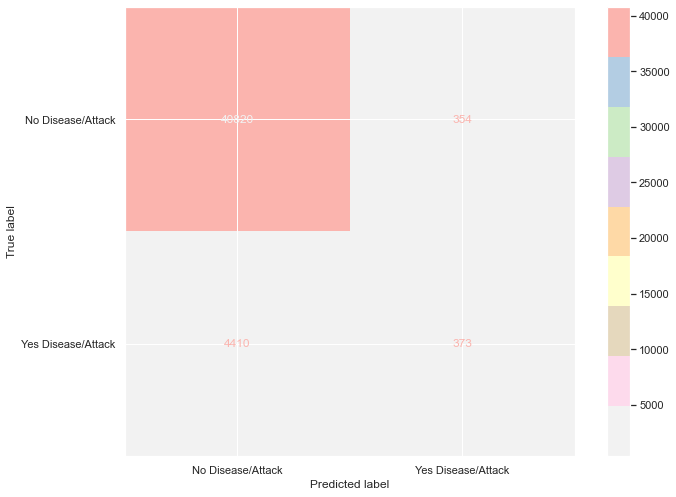

In [21]:
start = time.time()

### Build model
logR = LogisticRegression(penalty = "none")
logR.fit(X_train, Y_train)   
print("Logistic Regression model correctly predicts whether a patient has heart disease attack or not about",round(logR.score(X_train, Y_train)*100, 2), "%.")

### Check performance of classifier
Yhat2 = logR.predict(X_test) #predicts label
print('Accuracy for test set for Logistic Regression = {}'.format(
    (round(confusion_matrix(Y_test, Yhat2)[0][0] + confusion_matrix(Y_test, Yhat2)[1][1])/len(Y_test))*100,2))
print(confusion_matrix(Y_test, Yhat2))

print('Accuracy for training set for Logistic Regression = {}'.format(
    (round(confusion_matrix(Y_train, logR.predict(X_train))[0][0] + confusion_matrix(Y_train, logR.predict(X_train))[1][1])/len(Y_train))*100,2))
print(confusion_matrix(Y_train, logR.predict(X_train)))

### Plot confusion matrix
plot_confusion_matrix(estimator=logR,
                      X = X_test,
                      y_true = Y_test,
                      display_labels=["No Disease/Attack", "Yes Disease/Attack"], cmap = "Pastel1_r")

### Classification report
print(classification_report(y_true = Y_test,y_pred = Yhat2,
                            target_names=["No Disease/Attack", "Yes Disease/Attack"]))

### Computation time
end = time.time()
print("Computation running time in Logistic Regression: ", round((end - start)/60,2), "secs.")

## 7.3. Comparison between LDA vs Logistic Regression

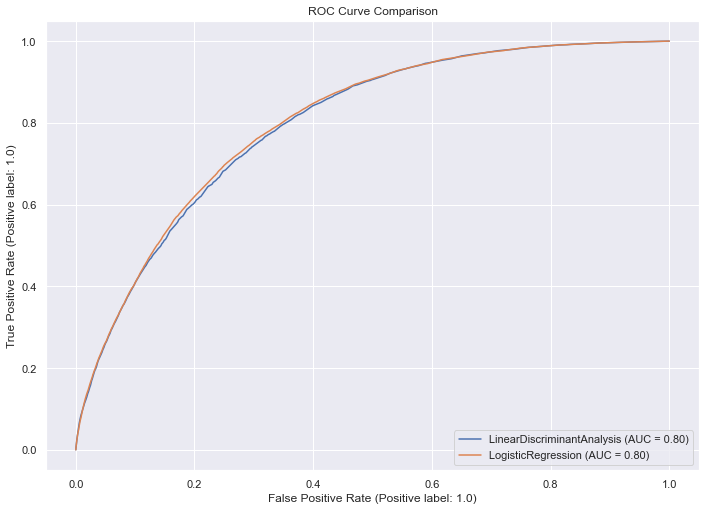

In [22]:
roc_lda = plot_roc_curve(estimator=lda, X=X_train, y = Y_train)
roc_log_reg = plot_roc_curve(estimator=logR, X = X_train, y = Y_train, ax = roc_lda.ax_)
plt.title("ROC Curve Comparison")
plt.show()

Both classifiers are close to 1 indicating they are perfect classifier for all threshold values. 

## 7.4. Support Vector Machine

SVM model correctly predicts whether a patient has heart disease attack or not about 0.8967708242666899 %.
Accuracy for training set for svm = 0.8967708242666899
[[164848      0]
 [ 18976      0]]
Accuracy for test set for svm = 0.9043236068498814
[[41216     0]
 [ 4741     0]]


/Users/selamawit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/selamawit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/selamawit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

 No Disease/Attack       0.90      1.00      0.95     41216
Yes Disease/Attack       0.00      0.00      0.00      4741

          accuracy                           0.90     45957
         macro avg       0.45      0.50      0.47     45957
      weighted avg       0.80      0.90      0.85     45957

Computation running time in Support Vector Classifier:  24.75 secs.


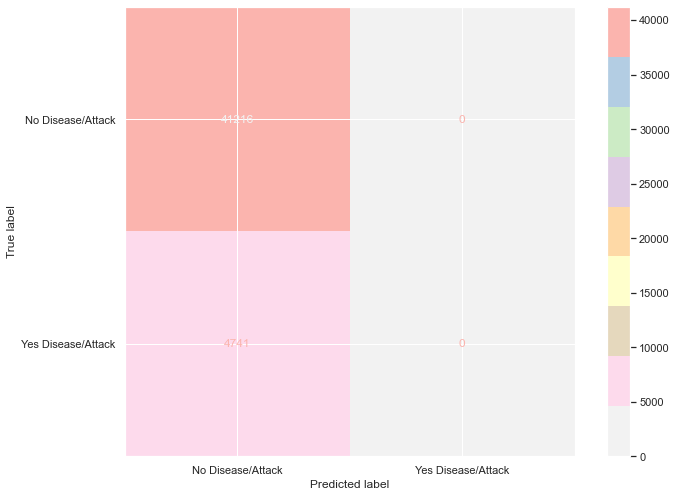

In [24]:
start = time.time()

### Build model
classifier = SVC(kernel = 'linear') 
classifier.fit(X_train, Y_train)   
print("SVM model correctly predicts whether a patient has heart disease attack or not about", classifier.score(X_train, Y_train), "%.")

### Check performance of classifier
print('Accuracy for training set for svm = {}'.format(
    (confusion_matrix(Y_train, classifier.predict(X_train))[0][0] + confusion_matrix(Y_train, classifier.predict(X_train))[1][1])/len(Y_train)))
print(confusion_matrix(Y_train, classifier.predict(X_train)))

Yhat3 = classifier.predict(X_test) #predict Yhat
print('Accuracy for test set for svm = {}'.format(
    (confusion_matrix(Y_test, Yhat3)[0][0] + confusion_matrix(Y_test, Yhat2)[1][1])/len(Y_test)))
print(confusion_matrix(Y_test, Yhat3))

### Plot confusion matrix
plot_confusion_matrix(estimator=classifier,
                      X = X_test,
                      y_true = Y_test,
                      display_labels=["No Disease/Attack", "Yes Disease/Attack"], cmap = "Pastel1_r")


### Classification report
print(classification_report(y_true = Y_test,y_pred = Yhat3,
                            target_names=["No Disease/Attack", "Yes Disease/Attack"]))

### Computation time
end = time.time()
print("Computation running time in Support Vector Classifier: ", round((end - start)/60, 2), "secs.")

## 7.5 Naive Bayes Classifier

Naive Bayes model correctly predicts whether a patient has heart disease attack or not about 0.8644573069892941 %.
Accuracy for training set for Naive Bayes Classifer = 0.8644573069892941
[[152760  12130]
 [ 12786   6148]]
Accuracy for test set for Naive Bayes Classifer = 0.8645255347389952
[[38154  3020]
 [ 3206  1577]]
                    precision    recall  f1-score   support

 No Disease/Attack       0.92      0.93      0.92     41174
Yes Disease/Attack       0.34      0.33      0.34      4783

          accuracy                           0.86     45957
         macro avg       0.63      0.63      0.63     45957
      weighted avg       0.86      0.86      0.86     45957

Computation running time in Naive Bayes:  0.02 secs.


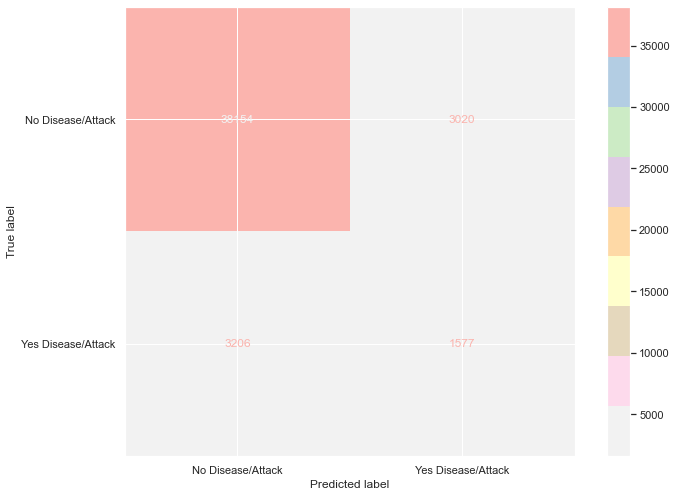

In [23]:
start = time.time()

### Build model
classifier2 = GaussianNB()
classifier2.fit(X_train, Y_train) 
print("Naive Bayes model correctly predicts whether a patient has heart disease attack or not about",classifier2.score(X_train, Y_train), "%.")

### Check performance of classifier
print('Accuracy for training set for Naive Bayes Classifer = {}'.format(
    (confusion_matrix(Y_train, classifier2.predict(X_train))[0][0] + confusion_matrix(Y_train, classifier2.predict(X_train))[1][1])/len(Y_train)))
print(confusion_matrix(Y_train, classifier2.predict(X_train)))

Yhat4 = classifier2.predict(X_test) 
print('Accuracy for test set for Naive Bayes Classifer = {}'.format(
    (confusion_matrix(Y_test, Yhat4)[0][0] + confusion_matrix(Y_test, Yhat4)[1][1])/len(Y_test)))
print(confusion_matrix(Y_test, Yhat4))

### Plot confusion matrix
plot_confusion_matrix(estimator=classifier2,
                      X = X_test,
                      y_true = Y_test,
                      display_labels=["No Disease/Attack", "Yes Disease/Attack"], cmap = "Pastel1_r")

### Classification report
print(classification_report(y_true = Y_test, y_pred = Yhat4,
                            target_names=["No Disease/Attack", "Yes Disease/Attack"]))

### Computation time
end = time.time()
print("Computation running time in Naive Bayes: ", round((end - start)/60,2), "secs.")

## 7.6 Decision Tree

In [24]:
# Entropy: measures the uncertainty of a random variable
# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 2, min_samples_leaf = 5)
  
# Performing training
Yhat_e = clf_entropy.fit(X_train, Y_train)

# Predicton on test 
Y_pred_e = Yhat_e.predict(X_test)

print("Report : ", classification_report(Y_test, Y_pred_e))

Report :                precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     41174
         1.0       0.00      0.00      0.00      4783

    accuracy                           0.90     45957
   macro avg       0.45      0.50      0.47     45957
weighted avg       0.80      0.90      0.85     45957



/Users/selamawit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/selamawit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/selamawit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


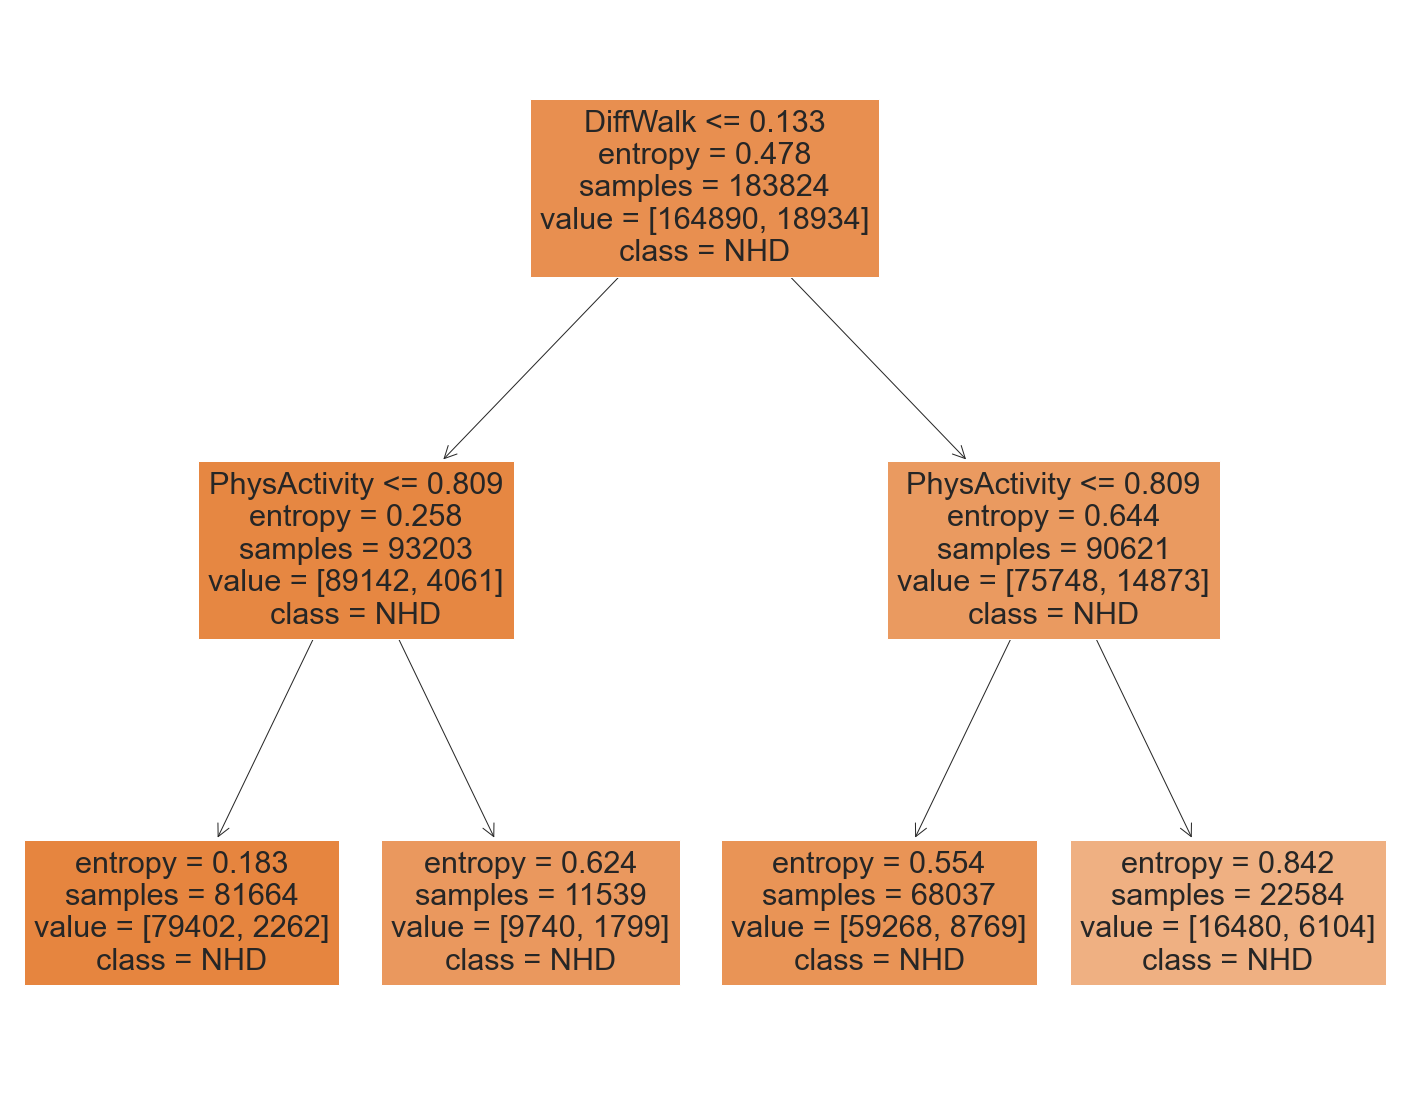

In [25]:
# Plotting the Decision Tree
feature_names = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'DiffWalk', 'Age']
class_names = ["NHD", "HD"]
fig = plt.figure(figsize=(25, 20))
plot = tree.plot_tree(Yhat_e, 
               feature_names = feature_names,
               class_names = class_names,
               filled = True)

# 8. Feature Selection using Tree based classifier

-It gives a score for each predictor 

-The higher the score, the more important/relevant is the predictor towards the target variable

[0.02593828 0.0225067  0.00393566 0.1910713  0.01800667 0.02810622
 0.02526501 0.02657367 0.02922523 0.02582359 0.00788057 0.00818261
 0.01515908 0.06575793 0.07159256 0.0896574  0.02672678 0.01958896
 0.11612647 0.07863384 0.10424145]


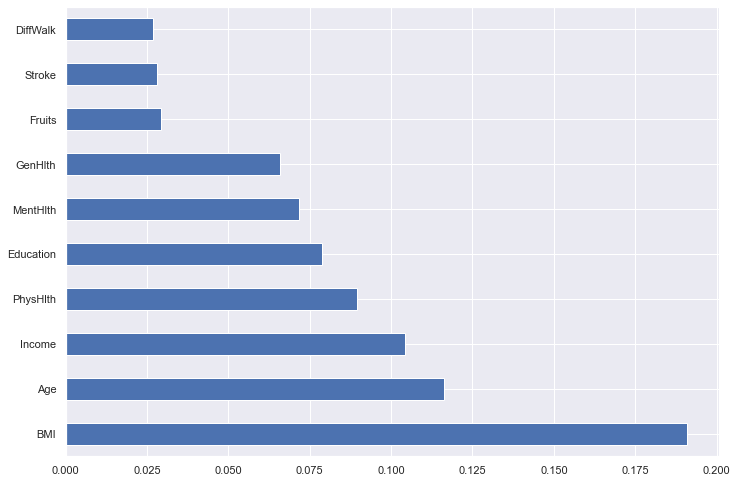

In [26]:
X = heart.iloc[:,1:23]  
Y = heart.iloc[:,0]    

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
features = ['BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'MentHlth', 'GenHlth']
X = heart.loc[:, features].values
Y = heart.loc[:, ['HeartDiseaseorAttack']].values

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Standardize features:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [28]:
# Entropy: measures the uncertainty of a random variable
# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 2)
  
# Performing training
Yhat_e = clf_entropy.fit(X_train, Y_train)

# Predicton on test 
Y_pred_e = Yhat_e.predict(X_test)

print("Report : ", classification_report(Y_test, Y_pred_e))

Report :                precision    recall  f1-score   support

         0.0       0.90      1.00      0.94     41164
         1.0       0.00      0.00      0.00      4793

    accuracy                           0.90     45957
   macro avg       0.45      0.50      0.47     45957
weighted avg       0.80      0.90      0.85     45957



/Users/selamawit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/selamawit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/selamawit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


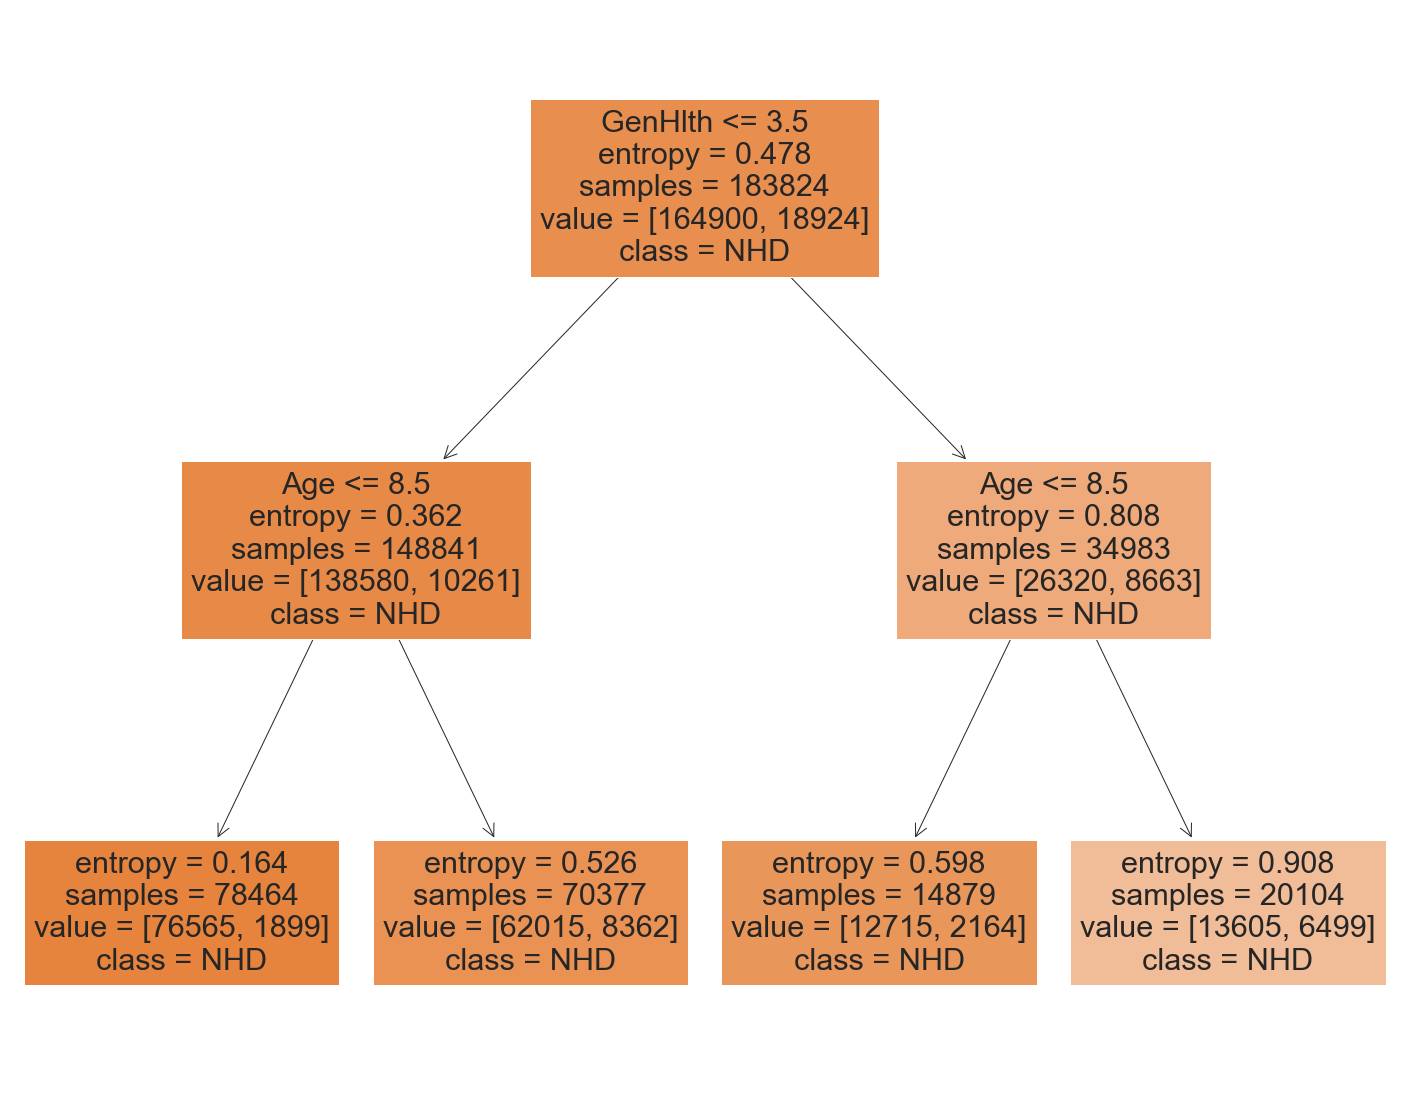

In [29]:
# Plotting the Decision Tree
feature_names = ['BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'MentHlth', 'GenHlth']
class_names = ["NHD", "HD"]
fig = plt.figure(figsize=(25, 20))
plot = tree.plot_tree(Yhat_e, 
               feature_names = feature_names,
               class_names = class_names,
               filled = True)

# 9. Reference:

https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset